In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [12]:
data= pd.read_csv("/content/bank.csv", delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
data.shape

(4521, 17)

In [14]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [15]:
print(data.job.value_counts())

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


In [16]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  # Target variable encoding done separately
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


In [18]:
# Encode the target variable 'y' (1 for 'yes', 0 for 'no')
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [24]:
x= data.drop('y',axis=1)
y = data['y']

In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
model.feature_importances_

array([0.10944116, 0.0502833 , 0.02313549, 0.03074854, 0.00434235,
       0.10507177, 0.01997314, 0.00968194, 0.01897743, 0.09120111,
       0.08196936, 0.29337315, 0.03728527, 0.05027259, 0.02890475,
       0.04533866])

In [34]:
y_pred = model.predict(x_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[1172,   33],
       [ 106,   46]])

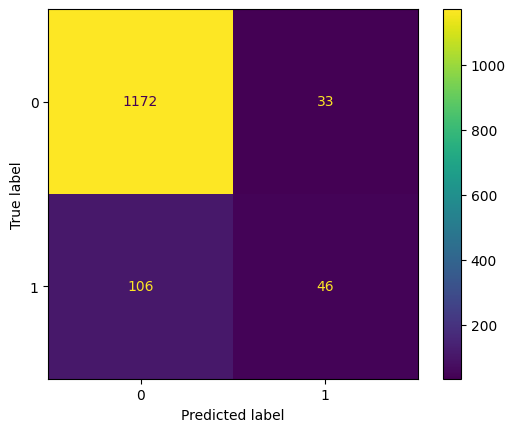

In [44]:
# plot_confusion_matrix(model,x_test, y_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8975681650700074

<Axes: xlabel='tree'>

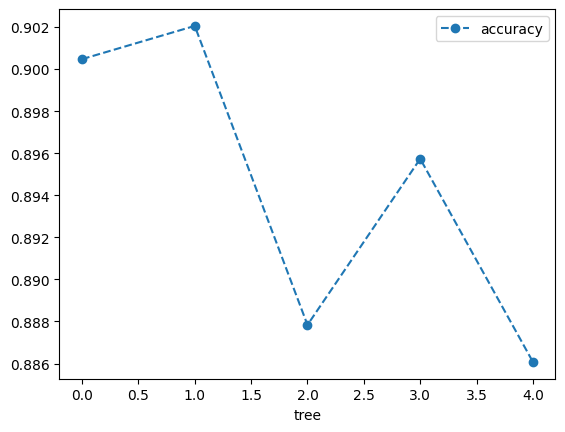

In [46]:
scores = cross_val_score(model,x_train,y_train, cv=5)

df = pd.DataFrame(data={'tree': range(5),'accuracy': scores})
df.plot(x='tree', y='accuracy', marker ='o',linestyle='--')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1278
           1       0.30      0.58      0.40        79

    accuracy                           0.90      1357
   macro avg       0.64      0.75      0.67      1357
weighted avg       0.93      0.90      0.91      1357



In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [51]:
rf_classifier = RandomForestClassifier(random_state=5)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
optimal_n_estimators = grid_search.best_estimator_.n_estimators
print("Optimal Number of Trees:", optimal_n_estimators)

Optimal Number of Trees: 50


In [53]:
optimal_max_depth = grid_search.best_estimator_.max_depth
print("Optimal Max Depth:", optimal_max_depth)

Optimal Max Depth: 10
